In [2]:
%run '/mnt/berger2/equipes/IGE/meom/workdir/berger2/fonctions/meom_fonctions/fonctions.ipynb'

import numpy as np
import matplotlib.pyplot as plt
import scipy.io.netcdf as netcdf
import qgutils as qg
from matplotlib import ticker, cm
plt.ion()

In [40]:
#paramètres gravés dans le marbre pour le stage

Delta = 10000                               #grid spacing
f0 = 9.37456E-05                           #paramètre de Coriolis
dh = np.array([350,750,2900])              #hauteurs des couches océaniques
dh_b = np.array([(dh[0]+dh[1])/2,(dh[1]+dh[2])/2])
g_prime = np.array([2.5E-02,1.25E-02])     #gravités réduites aux interfaces
Beta = 1.75360E-11
delta_ek = 5                               #ocean bottom Ekman thickness 
nu4 = 2E09                                 #bi-harmonic viscosity
Ht = np.sum(dh)
Ht_b = np.sum(dh_b)
toc = np.array([1.31693E+01,1.81693E+01,2.41693E+01])
bf = delta_ek*f0/(2*dh[-1])

#fréquences Brunt-vaisala

N_12 = g_prime[0]/((dh[0]+dh[1])/2)
N_23 = g_prime[1]/((dh[1]+dh[2])/2)
N2 = np.array([N_12,N_23])

#densité

rho1= 1000
rho2= 1000*(1-g_prime[0]/9.81)
rho3= rho2 - 1000*g_prime[1]/9.81

rho = np.array([rho1,rho2,rho3])

In [4]:
dir0  = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_6/'
dir1 = '/mnt/berger2/equipes/IGE/meom/workdir/berger2/qgcm-data/double_gyre_coupled/outdata_9tdiff/'
file0 = 'ocpo.nc'
file1 = 'ocsst.nc'
file_at = 'atpa.nc'

In [5]:
#get fields psi
pfile = dir0 + file0

at_file = dir1 + file_at
#wind forcing
forcing_z = dir0 + file1

#buyoancy forcing
forcing_b = dir0 + file1
forcing_b_rel = dir1 + file1

f1 = netcdf.netcdf_file(dir0 + file0,'r')
f2 = netcdf.netcdf_file(dir0 + file1,'r')


In [6]:
flot_me_et = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_abs/etapes_flot_moyen_abs.npz')
#b_me= integral_z(flot_me_et['b_me'], dh_b, Delta, Ht_b)
b_me= flot_me_et['b_me']
p_me = flot_me_et['p_me']


flot_me_et_rel = np.load('/mnt/berger2/equipes/IGE/meom/workdir/berger2/git/meom_test/Lorenz_cycle/tableaux_termes_rel/etapes_flot_moyen_rel.npz')
p_me_rel = flot_me_et_rel['p_me']
b_me_rel = flot_me_et_rel['b_me']

In [7]:
#get xp, yp : basin size
f1 = netcdf.netcdf_file(dir0 + file0,'r')

xp = f1.variables['xp'][:-1].copy()
yp = f1.variables['xp'][:-1].copy()
zp = f1.variables['z'][:].copy()

In [8]:
N2,f0 = qg.reshape3d(dh,N2,f0)

si_t = f1.variables['time'][:].copy().size

p = qg.read_qgcm(pfile, 0, var='p', rescale = 1/f0, interp = True, subtract_bc = False )
nl,N,naux = p.shape

p_at = qg.read_qgcm(at_file, 0, var='p', rescale = 1/f0, interp = True, subtract_bc = False )
nl_at,N_at,naux_at = p_at.shape

test = si_t

average = True

In [29]:
zeta_abs = np.ones((512,2))

print(zeta_abs.shape)

(512, 2)


In [30]:
#isopycnes en x env 1000

z= np.array([0,2.9])

zeta_abs_y = np.ones((512,2))
zeta_abs_y[:,0] = - b_me[0,100,:]*(1/N_12)
zeta_abs_y[:,1] = - b_me[1,100,:]*(1/N_23)

rho_y_abs = dh_b*np.ones((512,2)) + zeta_abs_y


In [61]:
z= np.array([0,2.9])

zeta_rel_y = np.ones((512,2))
zeta_rel_y[:,0] = - b_me_rel[0,100,:]*(1/N_12)
zeta_rel_y[:,1] = - b_me_rel[1,100,:]*(1/N_23)

rho_y_rel = dh_b*np.ones((512,2)) + zeta_rel_y

Text(0, 0.5, 'z ')

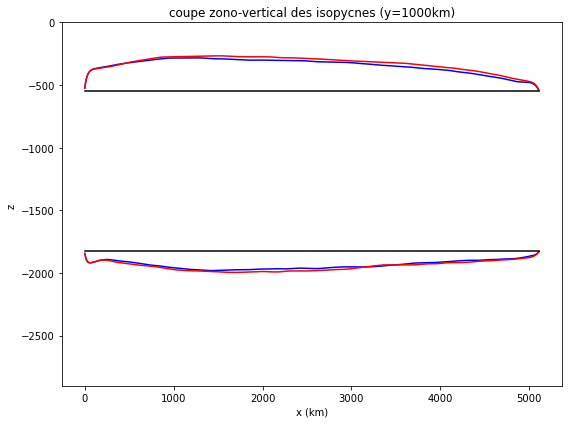

In [62]:
fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)

ax1.plot(xp, -rho_y_abs[:,0], 'b')
ax1.plot(xp, -rho_y_abs[:,1], 'b')
ax1.plot(xp, -rho_y_rel[:,0], 'r')
ax1.plot(xp, -rho_y_rel[:,1], 'r')
ax1.plot(xp, -dh_b*np.ones((512,2)), 'k')
#ax1.plot(xp, rho_y, levels = 1, colors = 'red')
#ax1.contour(xp , -zp, rho_y_nord, levels = 1, colors = 'blue')
#ax1.set_aspect('equal')
ax1.set_ylim(-2900,0)
ax1.set_title('coupe zono-vertical des isopycnes (y=1000km)')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('z ')


In [48]:
zeta_abs_x = np.ones((512,2))
zeta_abs_x[:,0] = - b_me[0,:,100]*(1/N_12)
zeta_abs_x[:,1] = - b_me[1,:,100]*(1/N_23)



rho_x_abs = dh_b*np.ones((512,2)) + zeta_abs_x

In [57]:
zeta_rel_x = np.ones((512,2))
zeta_rel_x[:,0] = - b_me_rel[0,:,100]*(1/N_12)
zeta_rel_x[:,1] = - b_me_rel[1,:,100]*(1/N_23)


rho_x_rel = dh_b*np.ones((512,2)) + zeta_rel_x

Text(0, 0.5, 'z ')

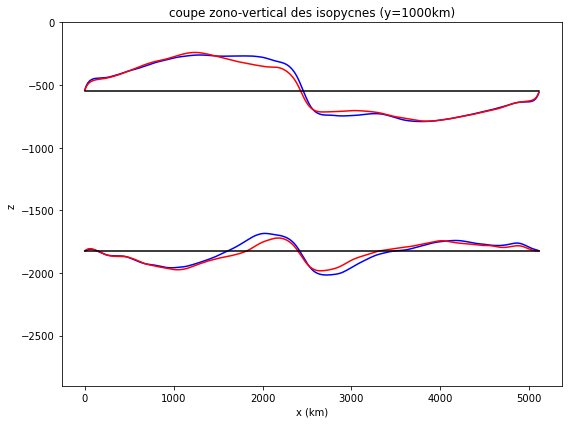

In [58]:
fig, ax1 = plt.subplots(1, 1, figsize = (8,6),tight_layout=True)

ax1.plot(xp, -rho_x_abs[:,0], 'b')
ax1.plot(xp, -rho_x_abs[:,1], 'b')
ax1.plot(xp, -rho_x_rel[:,0], 'r')
ax1.plot(xp, -rho_x_rel[:,1], 'r')
ax1.plot(xp, -dh_b*np.ones((512,2)), 'k')
#ax1.plot(xp, rho_y, levels = 1, colors = 'red')
#ax1.contour(xp , -zp, rho_y_nord, levels = 1, colors = 'blue')
#ax1.set_aspect('equal')
ax1.set_ylim(-2900,0)
ax1.set_title('coupe zono-vertical des isopycnes (y=1000km)')
ax1.set_xlabel('x (km)')
ax1.set_ylabel('z ')
